In [6]:
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 20
import warnings
import itertools
warnings.filterwarnings("ignore")

# - Time series dataset retrieving and cleaning

In [7]:
df = pd.read_csv("data/MER_T12_06.csv")
df.head()

,MSN,Month,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   Month         5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [9]:
# Changing Month from int to Date
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce') #coerce to have a NaN field in empty or corrupted
df = pd.read_csv("data/MER_T12_06.csv", parse_dates=['Month'], index_col='Month', date_parser=dateparse) 
df.head()

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [10]:
#drop all rows with null index 
#ts = time serie
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [11]:
#
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [12]:
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [13]:
ts.dropna(inplace = True)

# - Data Vizualisation

In [14]:
# sources = CO2 sources
sources = ts.groupby('Description')
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
Month,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


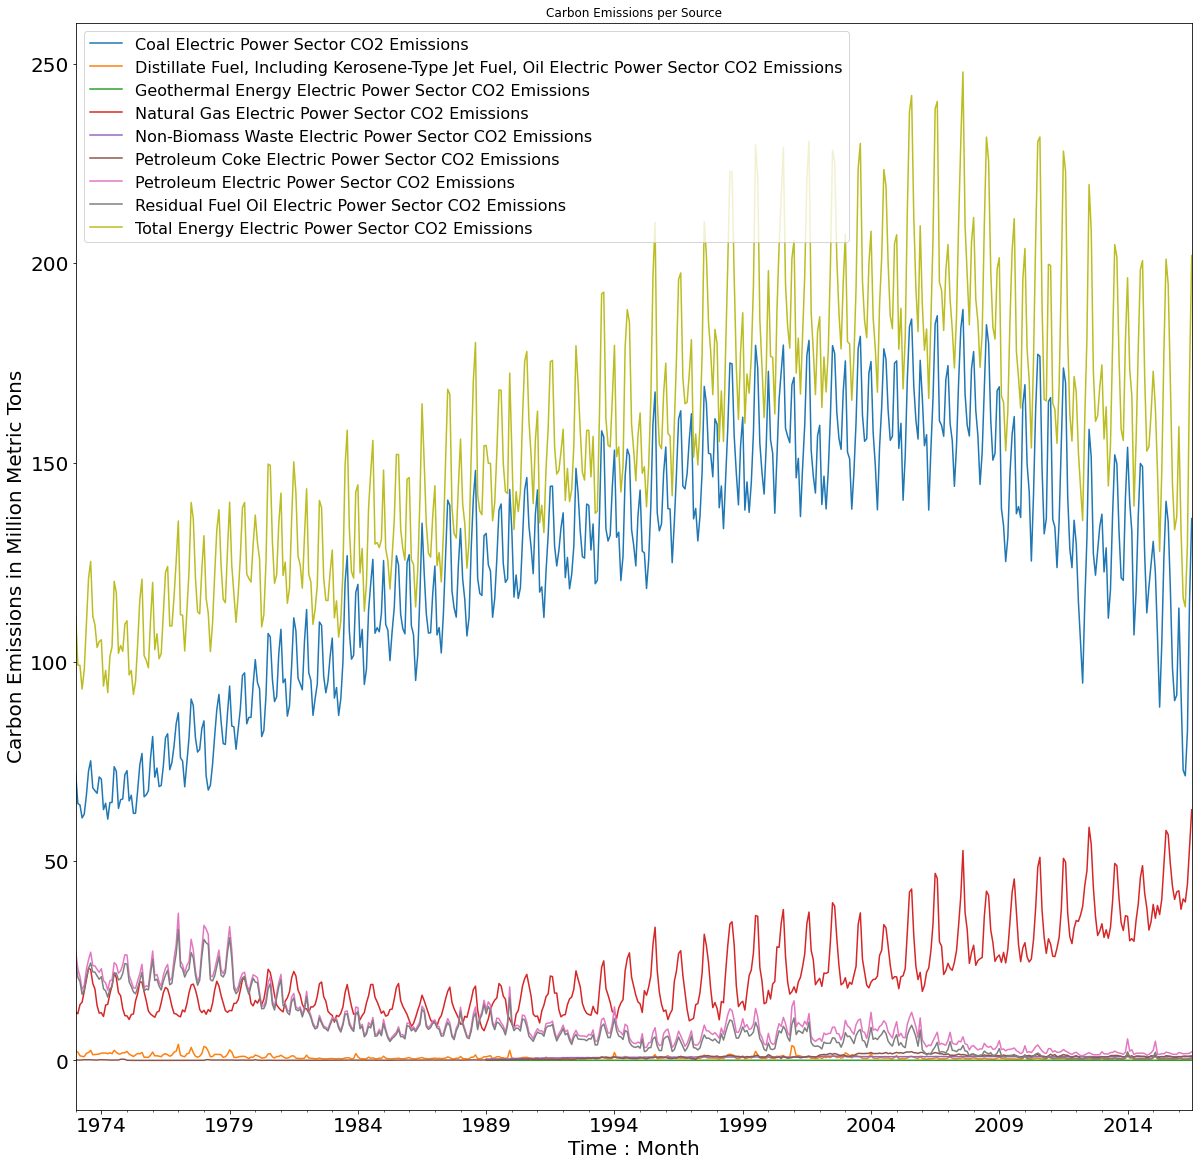

In [15]:
fig, ax = plt.subplots()
for desc, grp in sources:
    grp.plot( y='Value', label=desc,ax = ax, title='Carbon Emissions per Source', fontsize = 20)
    ax.set_xlabel('Time : Month')
    ax.set_ylabel('Carbon Emissions in Million Metric Tons')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)

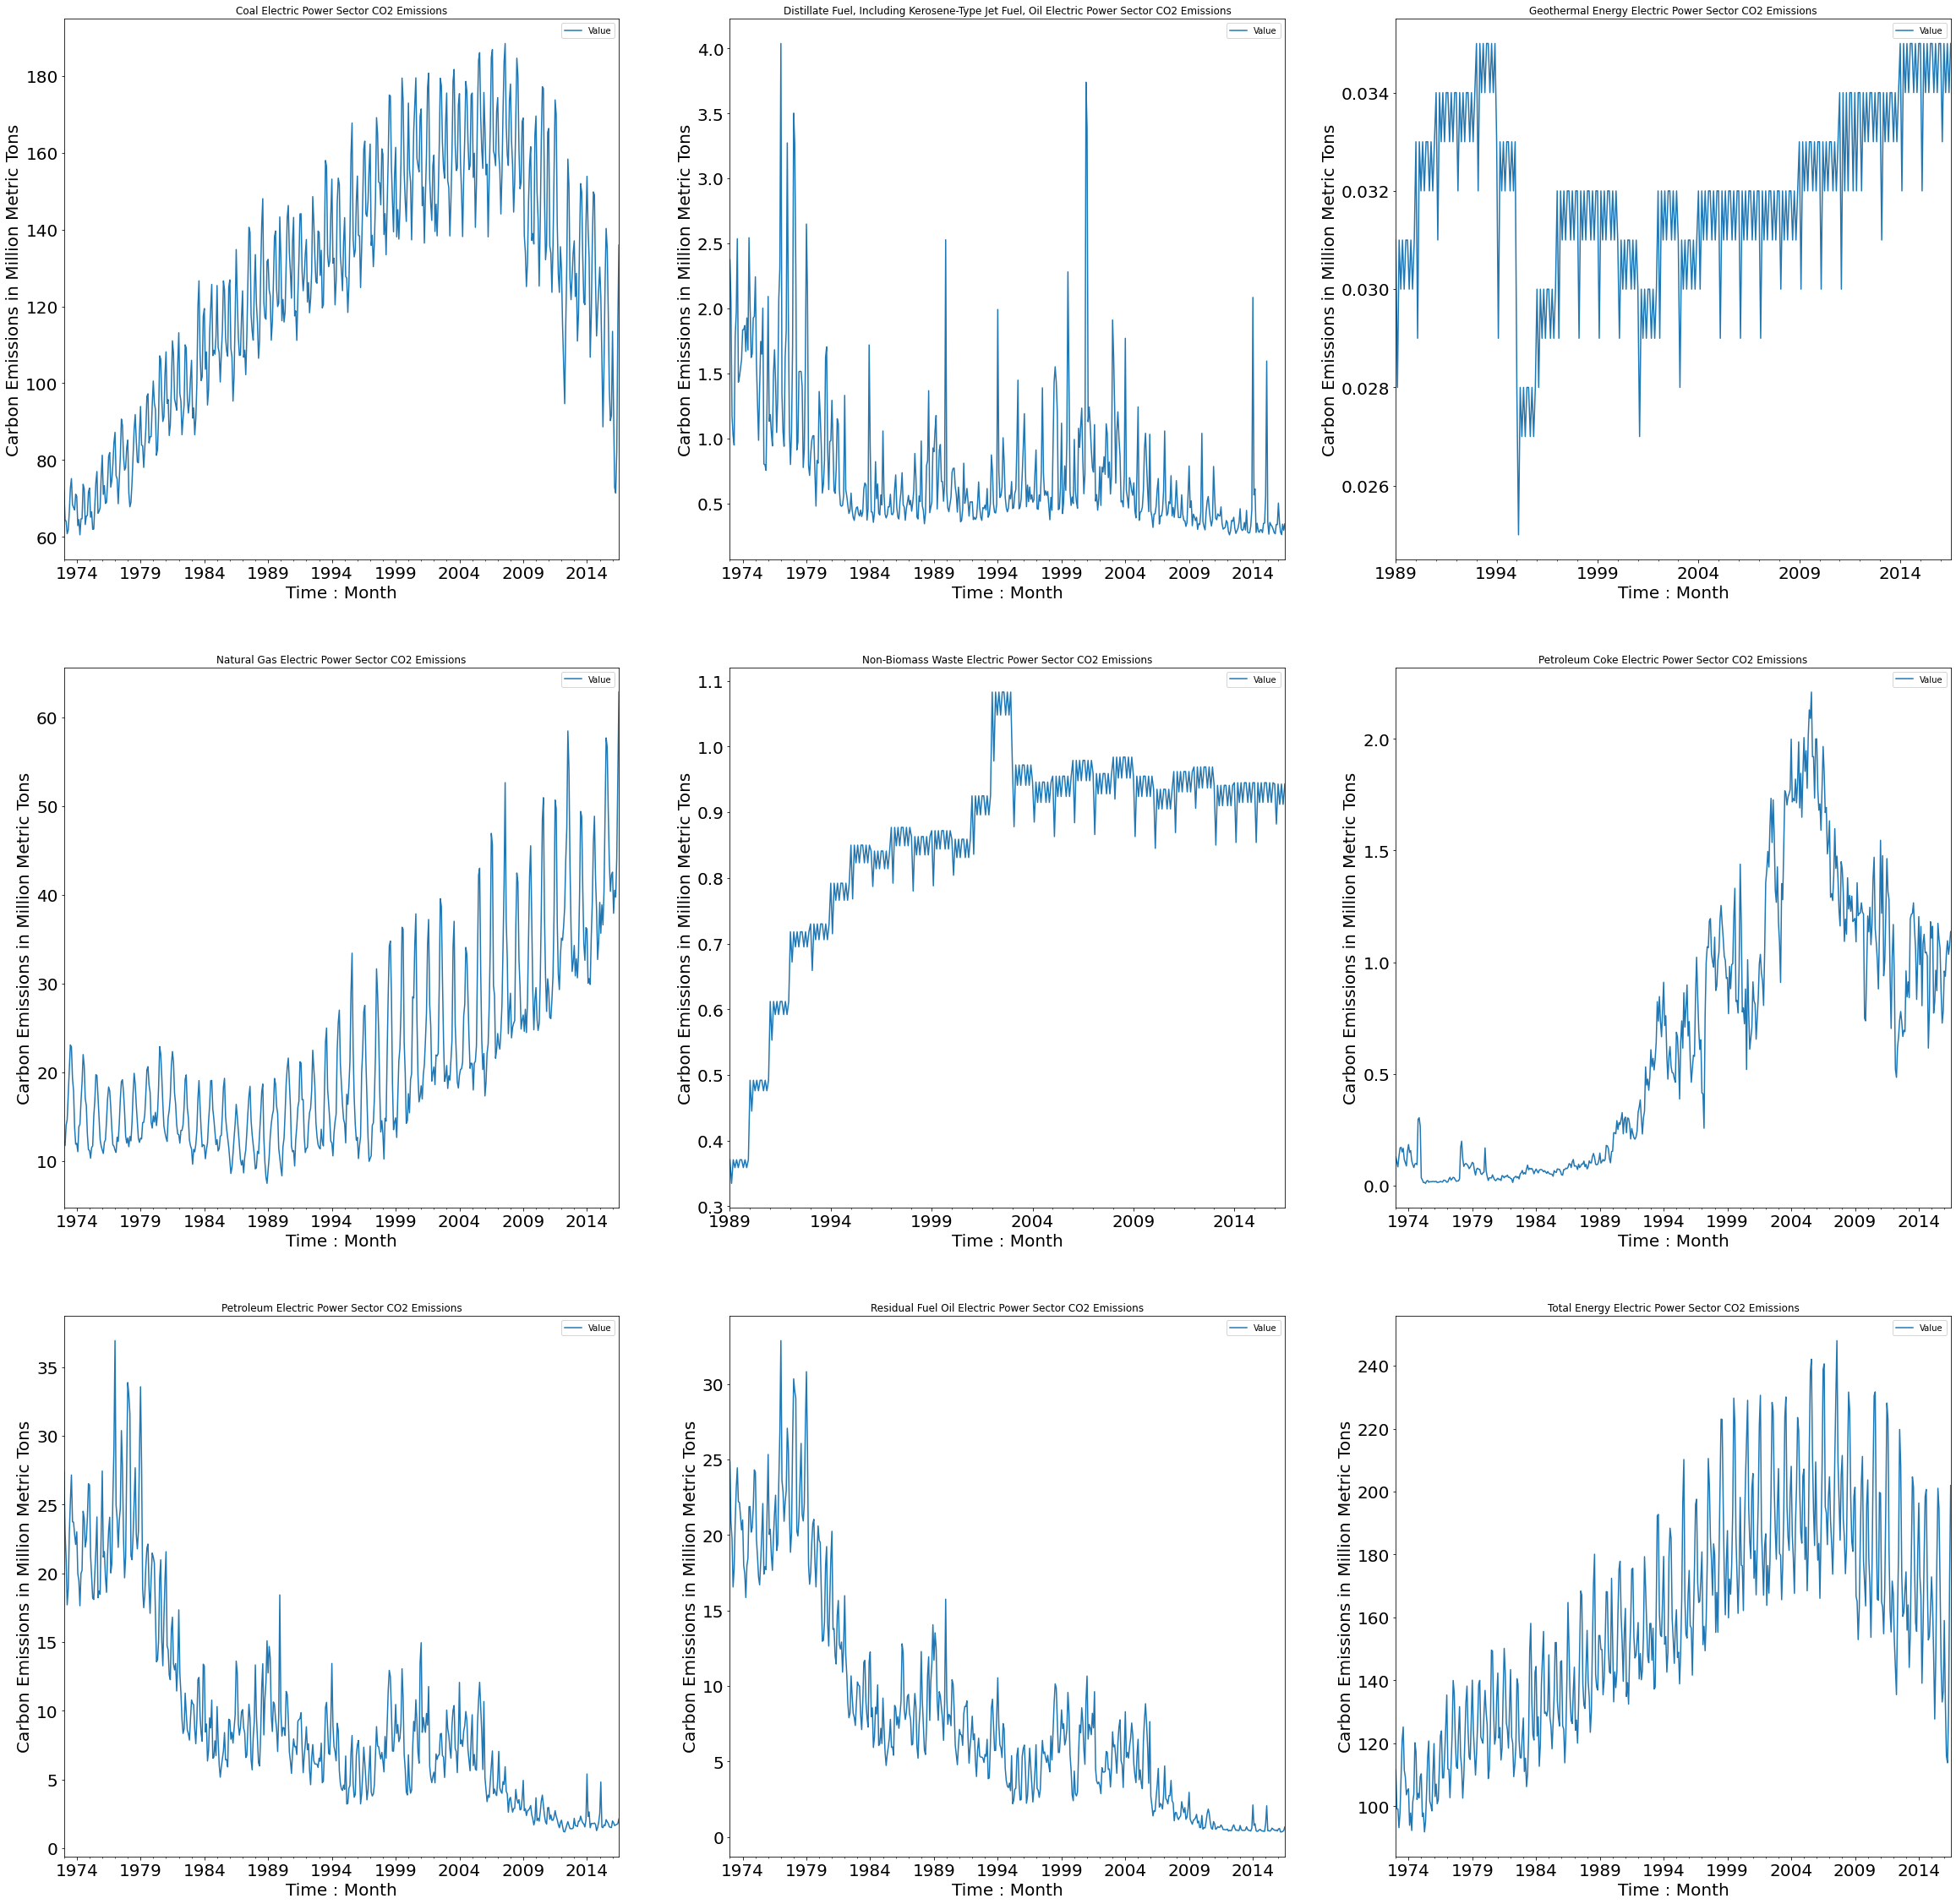

In [16]:
#Plot per Emission source
fig, axes = plt.subplots(3,3, figsize = (40, 40))
for (desc, group), ax in zip(sources, axes.flatten()):
    group.plot(y='Value',ax = ax, title=desc, fontsize = 20)
    ax.set_xlabel('Time : Month')
    ax.set_ylabel('Carbon Emissions in Million Metric Tons')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)


# - Emission by Sector

In [17]:
QuantityPerSource = ts.groupby('Description')['Value'].sum().sort_values()
src = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Full Emissions']

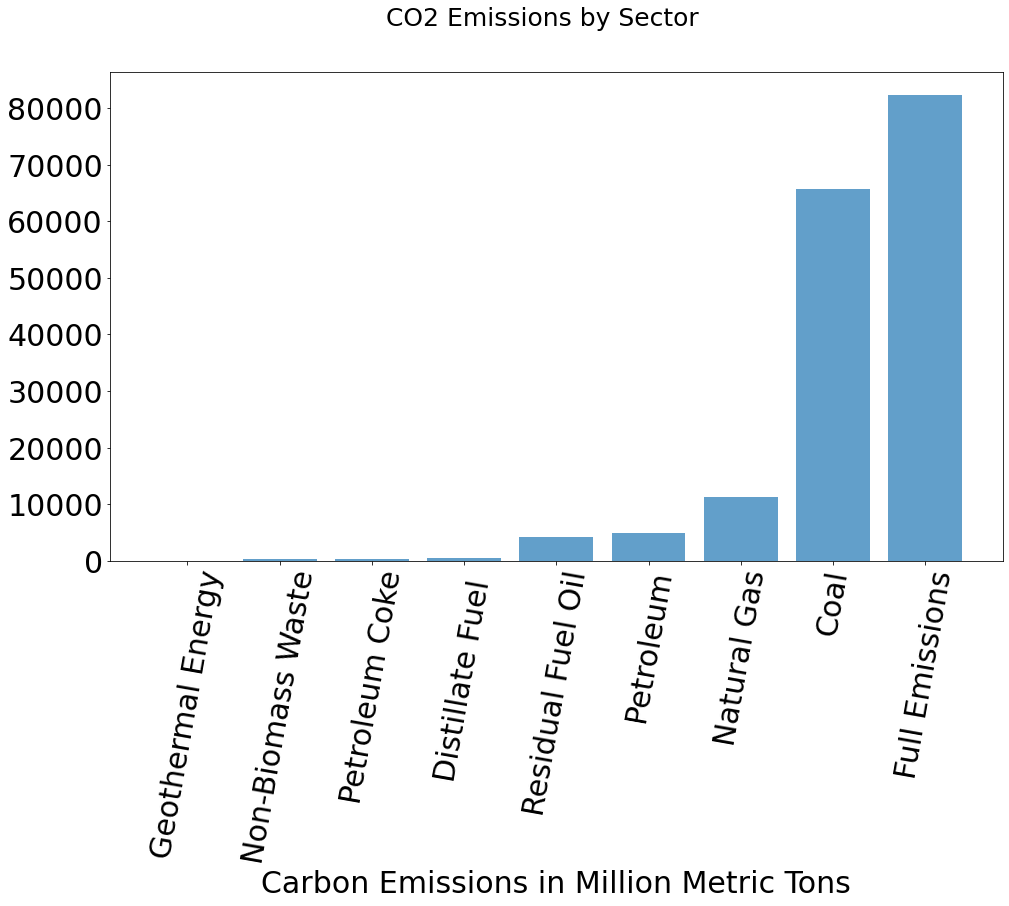

In [18]:
fig = plt.figure(figsize = (16,9))
x_label = src
x_tick = np.arange(len(src))
plt.bar(x_tick, QuantityPerSource, align = 'center', alpha = 0.7)
fig.suptitle("CO2 Emissions by Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 80, fontsize = 30 )
plt.yticks(fontsize = 30)
plt.xlabel('Carbon Emissions in Million Metric Tons', fontsize = 30)
plt.show()

# We will make our forecasting for 1 emission , i chosed the Petroleum Emission

In [19]:
# ems = emissions
ems = ts.drop(['MSN','Column_Order','Unit'], axis=1)  # droping columns and leting only value and description column
# Petroleum total emissions (pte)
pte = ems[ems['Description'] =="Petroleum Electric Power Sector CO2 Emissions"]
pte = pte.drop(['Description'], axis=1)
pte

,Value
Month,
1973-01-01,27.369
1973-02-01,23.034
1973-03-01,21.034
1973-04-01,17.714
1973-05-01,18.870
...,...
2016-03-01,1.654
2016-04-01,1.695
2016-05-01,1.743


# - Stationarity test
## mean , variance and covariance are constant over time

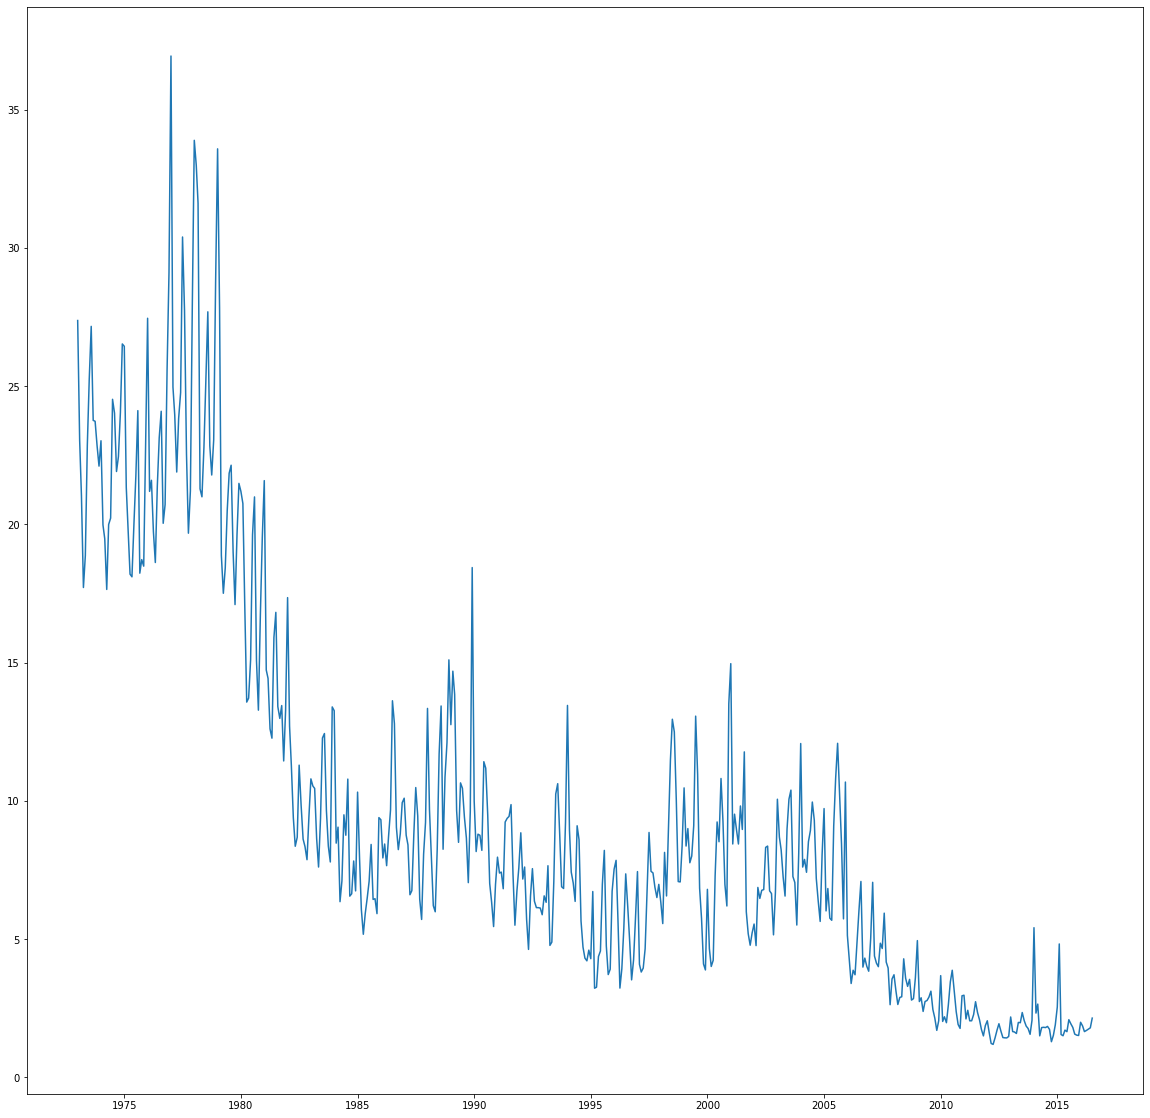

In [20]:
plt.plot(pte)
# same result 

### From the figures, there is a trend in the CO2 emission dataset with seasonal variation. So it's evident that the dataset is not stationary.

# - Test stationary using Dickey-Fuller Augmentation 
## the time serie is stationary if the p value is low (null by hypothesis) and and if the critical values at confidence intervals of 1%, 5%, 10% are as close as possible to the statistics of the ADF (Augmented Dickey-Fuller)

In [21]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

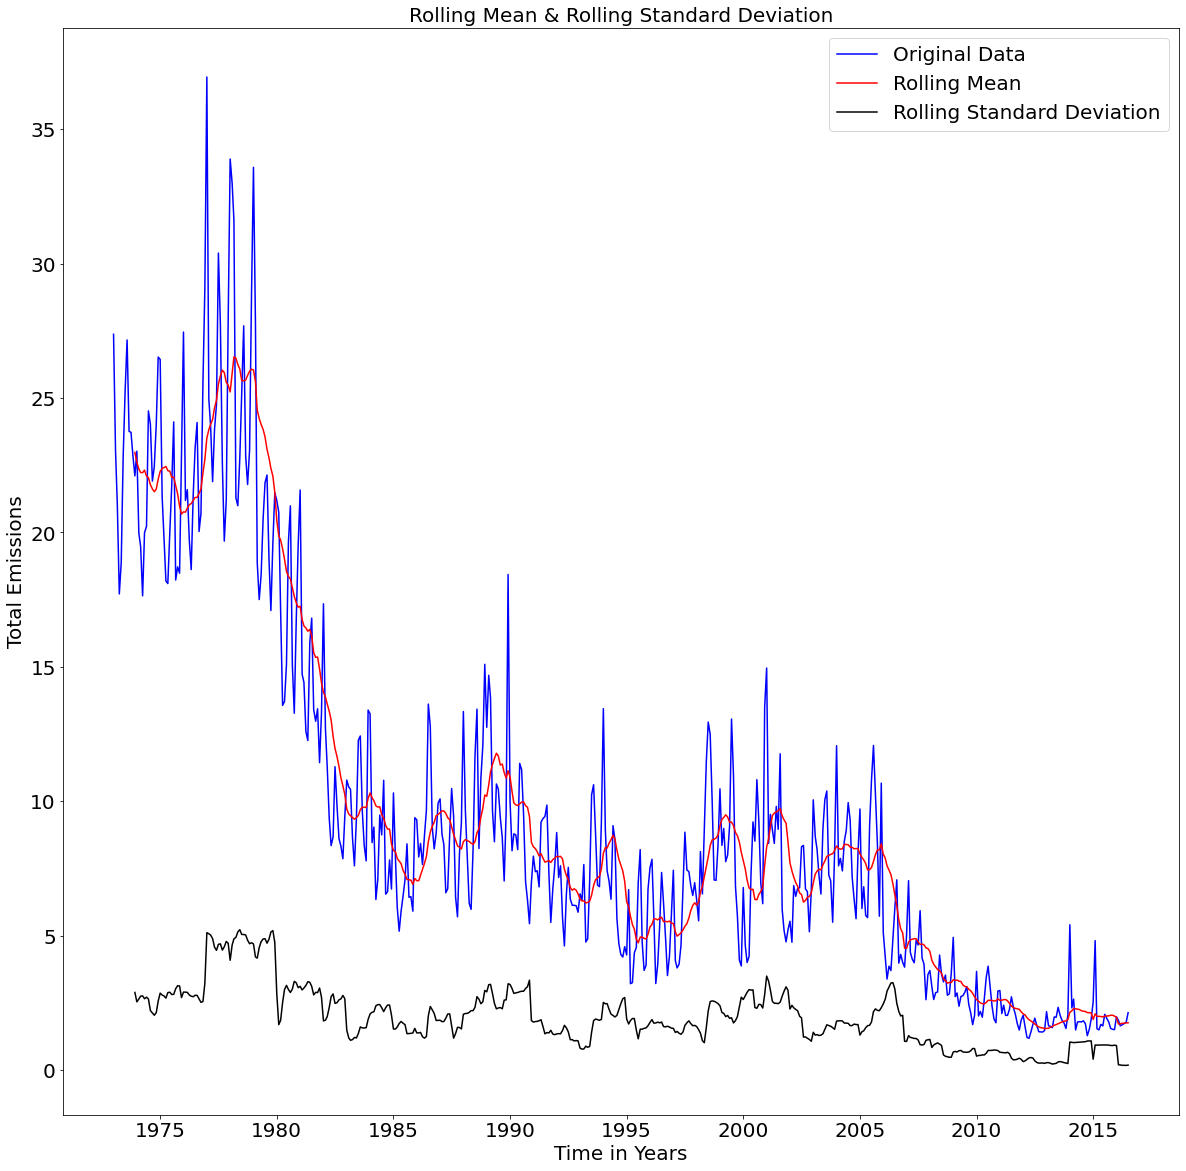

In [22]:
def TestStationaryPlt(pte):
    rolling_mean = pte.rolling(window = 12, center = False).mean()
    rolling_std = pte.rolling(window = 12, center = False).std()   
    plt.plot(pte, color = 'blue',label = 'Original Data')
    plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rolling_std, color ='black', label = 'Rolling Standard Deviation')
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)    
    plt.xlabel('Time in Years', fontsize = 20)
    plt.ylabel('Total Emissions', fontsize = 20)   
    plt.legend(loc='best', fontsize = 20)
    plt.title('Rolling Mean & Rolling Standard Deviation', fontsize = 20)
    plt.show()
TestStationaryPlt(pte)

In [23]:
def Adf_test(pte):
    result = adfuller(pte['Value'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
Adf_test(pte)

ADF Statistic: -1.577239936350926
p-value: 0.4950157307222759
Critical Values:
	1%: -3.44328828958775
	5%: -2.8672462791357867
	10%: -2.569809231353463


# - The ADF statistic is far from the critical values and the p-value is above the threshold (0.05). We can conclude that the time series is not stationary.

# - Transform the time serie to stationary

## to transform the time serie to a stationary one we will chose to substract the moving average from the original serie

In [24]:
moving_avg = pte.rolling(12).mean()
pte_trans = pte - moving_avg
pte_trans.head(13)

,Value
Month,
1973-01-01,NaN
1973-02-01,NaN
1973-03-01,NaN
1973-04-01,NaN
1973-05-01,NaN
1973-06-01,NaN
1973-07-01,NaN
1973-08-01,NaN
1973-09-01,NaN


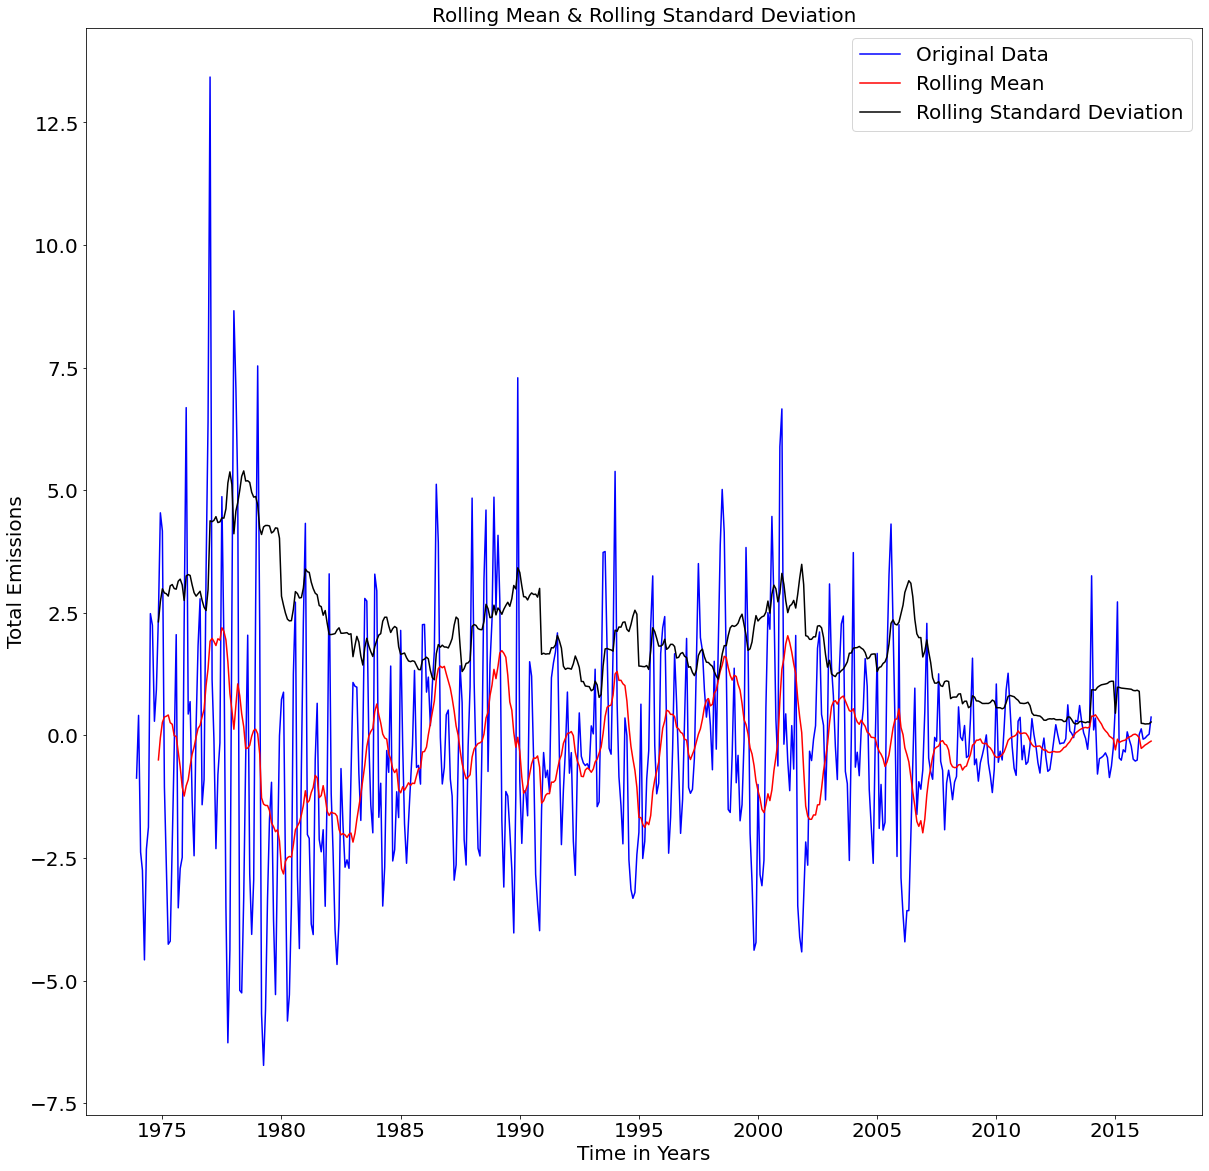

In [25]:
pte_trans.dropna(inplace=True)
TestStationaryPlt(pte_trans)

In [26]:
Adf_test(pte_trans)

ADF Statistic: -6.416719923762984
p-value: 1.8335421773119595e-08
Critical Values:
	1%: -3.4435761493506294
	5%: -2.867372960189225
	10%: -2.5698767442886696


## The Test Statistic is smaller than the 10% 5%, and 1% of critical values and the p value tend to 0. So, we can say that the time serie is a stationary serie

In [27]:
# - Find optimal parameters and build an ARIMA model

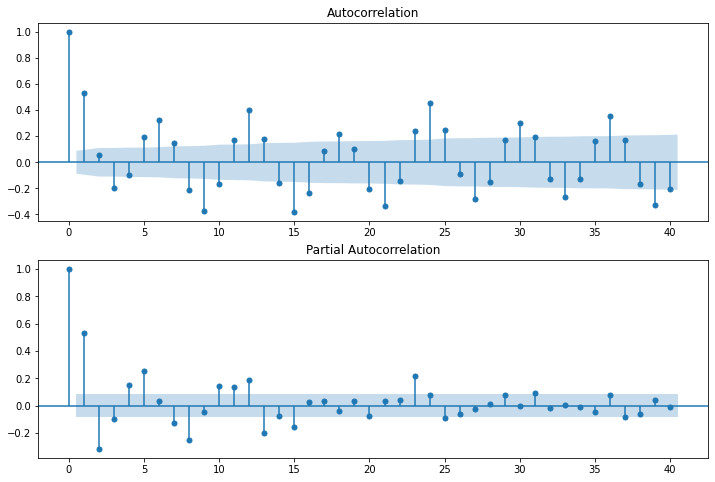

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(pte_trans.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(pte_trans.iloc[13:], lags=40, ax=ax2)

# - Fitting our Forecasting Model

### We’ll start by plugging the optimal parameter values into a new SARIMAX model:

In [29]:
mod = sm.tsa.statespace.SARIMAX(pte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\ULTRAPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ULTRAPC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4907      0.058      8.487      0.000       0.377       0.604
ma.L1         -0.8241      0.043    -19.351      0.000      -0.908      -0.741
ma.S.L12      -0.8368      0.027    -30.521      0.000      -0.891      -0.783
sigma2         2.8219      0.117     24.151      0.000       2.593       3.051


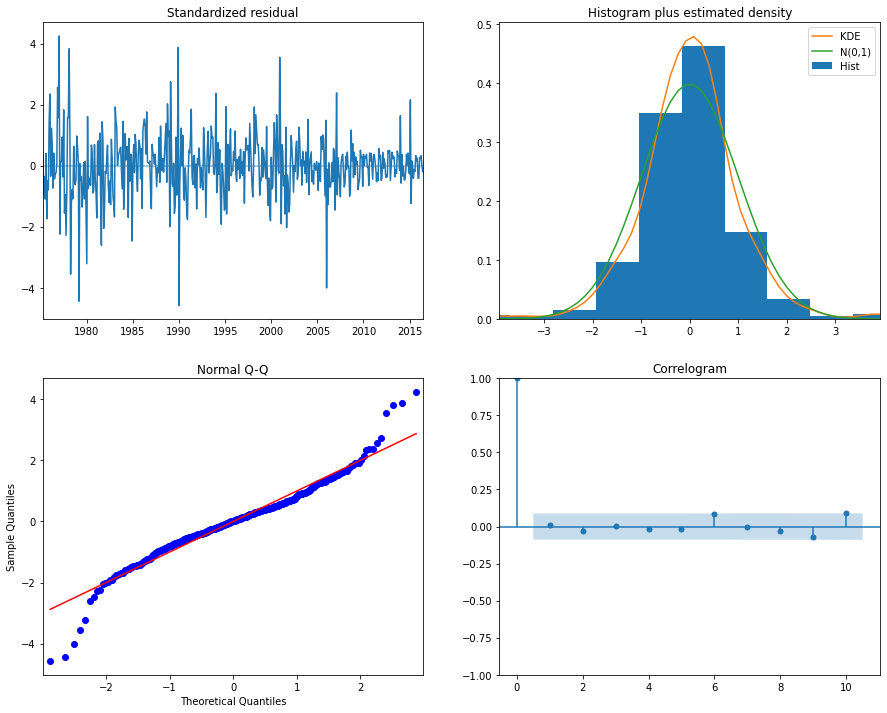

In [30]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

<AxesSubplot:ylabel='Density'>

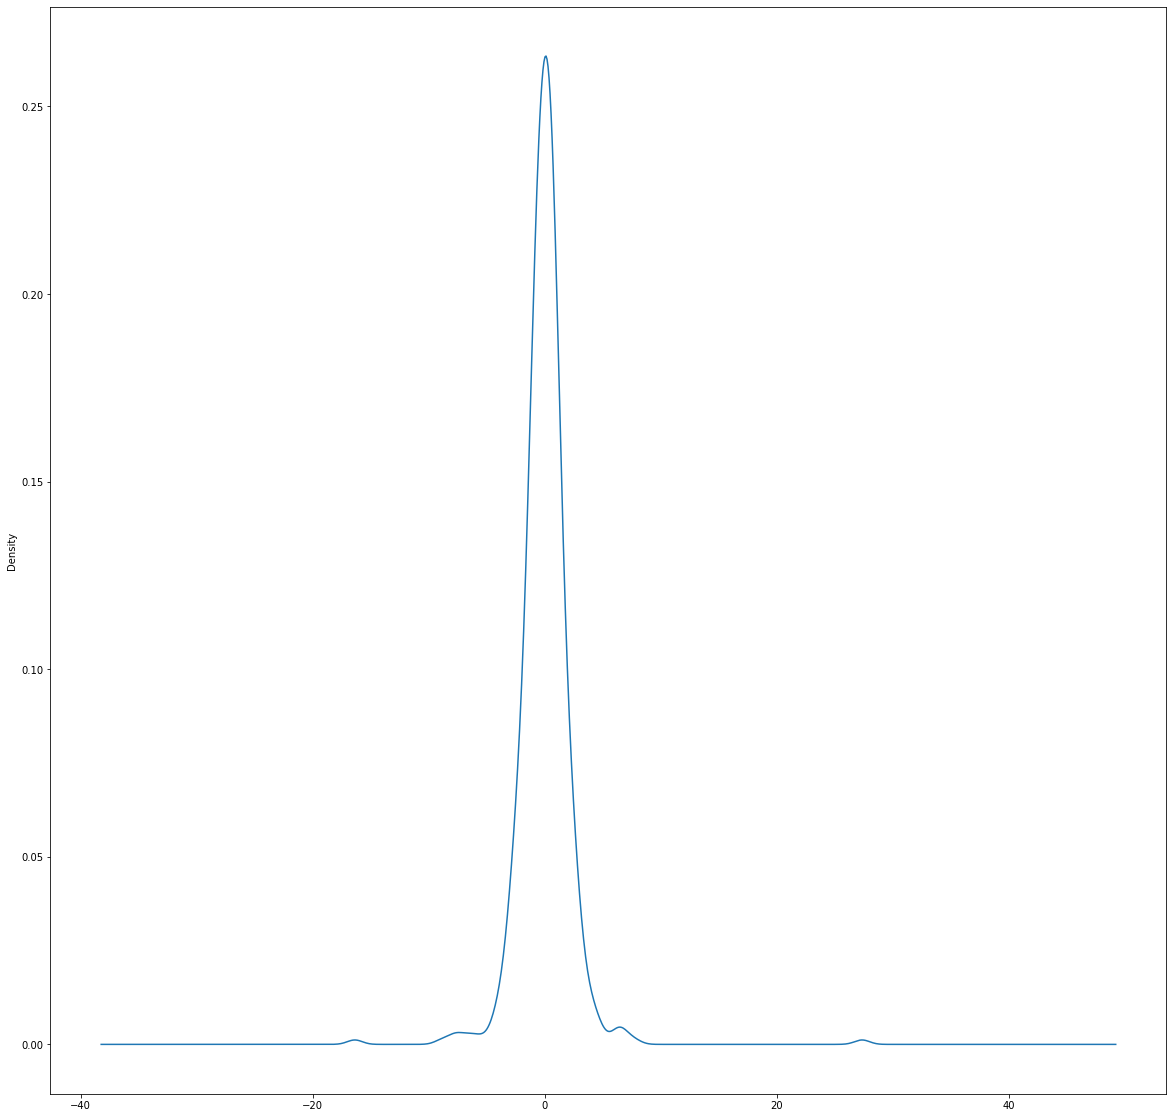

In [31]:
# gaussian residual error
results.resid.plot(kind='kde')

In [32]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Value,upper Value
1998-01-01,4.767898,11.352981
1998-02-01,2.235058,8.820106
1998-03-01,1.609884,8.194925
1998-04-01,2.598297,9.183333
1998-05-01,2.909631,9.494664


# - Printing forecasting values of the time series

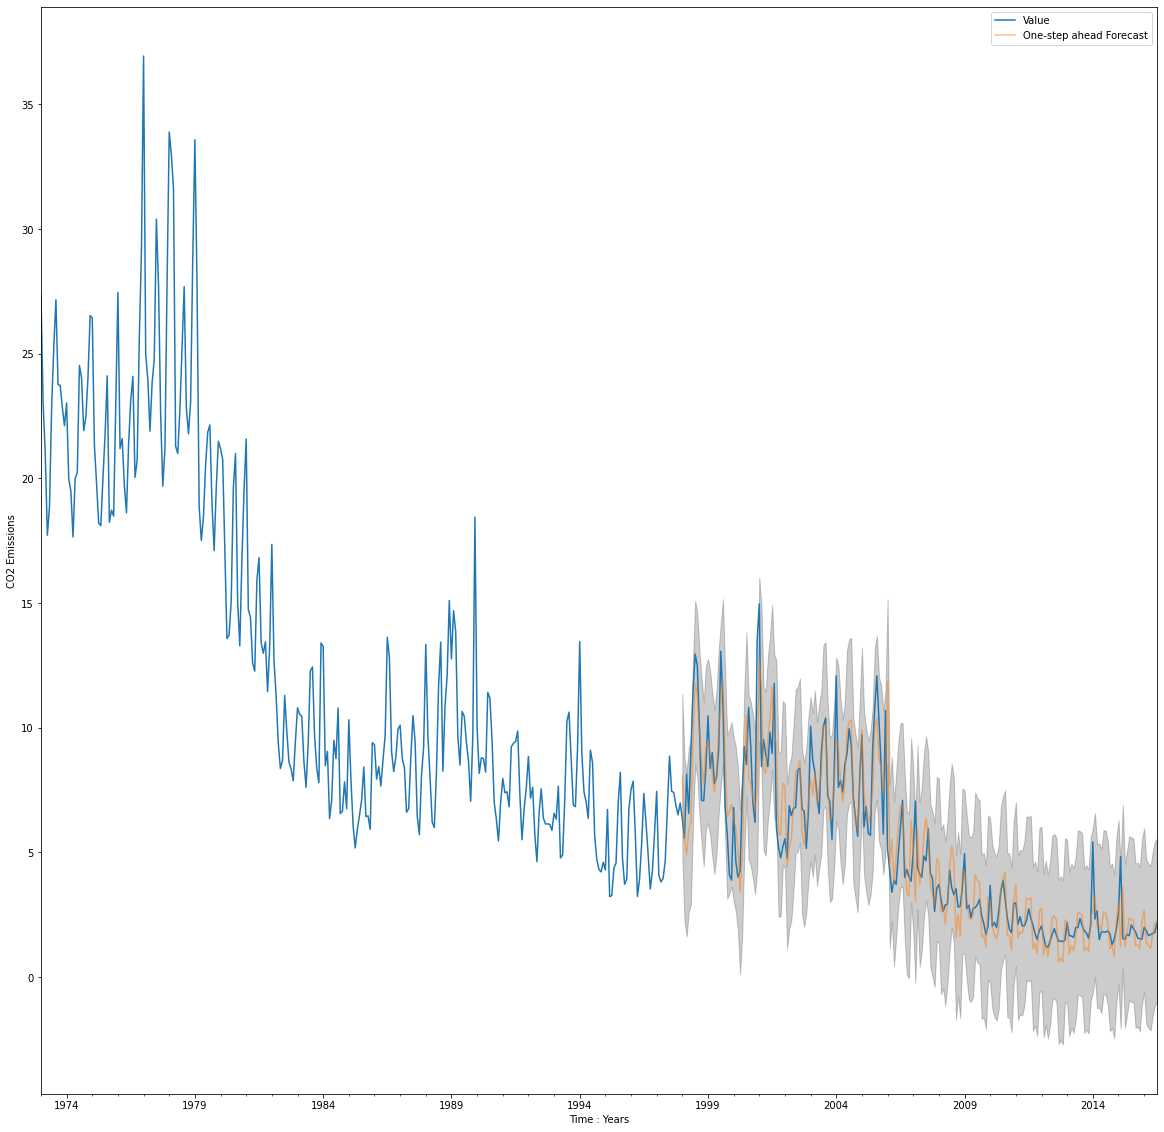

In [33]:
ax = pte['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.5)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time : Years')
ax.set_ylabel('CO2 Emissions')
plt.legend()

plt.show()